# Red Wine Quality Prediction

Data

https://raw.githubusercontent.com/twiradinata/datasets/main/red-wine.csv

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

#### Load Dataset:
https://raw.githubusercontent.com/twiradinata/datasets/main/red-wine.csv

In [2]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/red-wine.csv"
dataset = pd.read_csv(url)


In [3]:
dataset.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
778,8.3,0.43,0.30,3.4,0.079,7.0,34.0,0.99788,3.36,0.61,10.5,5
1145,8.2,0.20,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4,6
780,7.0,0.57,0.00,2.0,0.190,12.0,45.0,0.99676,3.31,0.60,9.4,6
1115,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1466,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7
974,8.8,0.33,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,7
250,10.8,0.32,0.44,1.6,0.063,16.0,37.0,0.99850,3.22,0.78,10.0,6
1217,8.2,0.34,0.37,1.9,0.057,43.0,74.0,0.99408,3.23,0.81,12.0,6
1139,8.2,0.51,0.24,2.0,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,6
358,11.9,0.43,0.66,3.1,0.109,10.0,23.0,1.00000,3.15,0.85,10.4,7


In [4]:
#Memeriksa data dengan value 0
(dataset ==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Memeriksa missing values
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

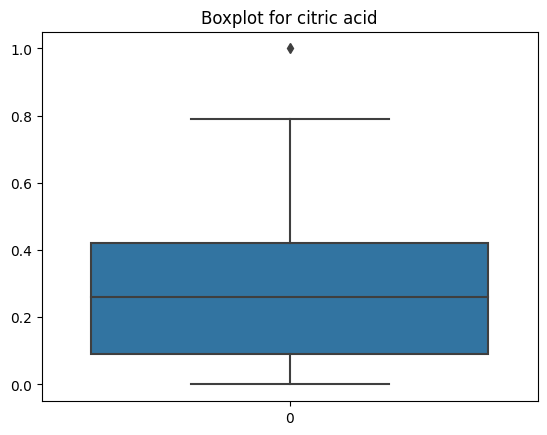

In [7]:
#tampilkan boxplot
sns.boxplot(data=dataset['citric acid'])
plt.title(f"Boxplot for {'citric acid'}")
plt.show()

### Exploratory Data Analysis (Univariate)

In [8]:
# Tampilkan EDA Univariate secara text dengan fungsi describe
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


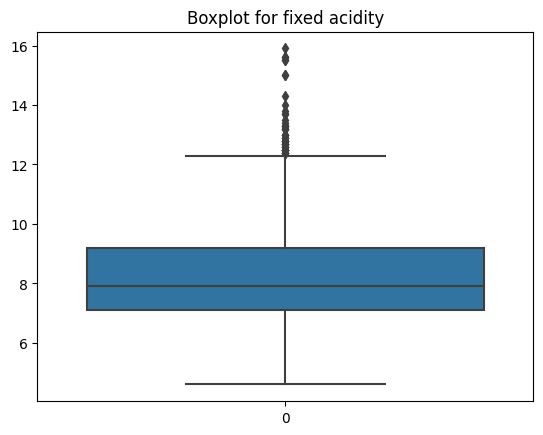

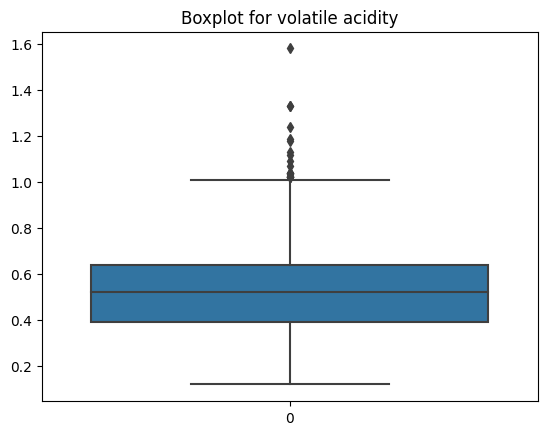

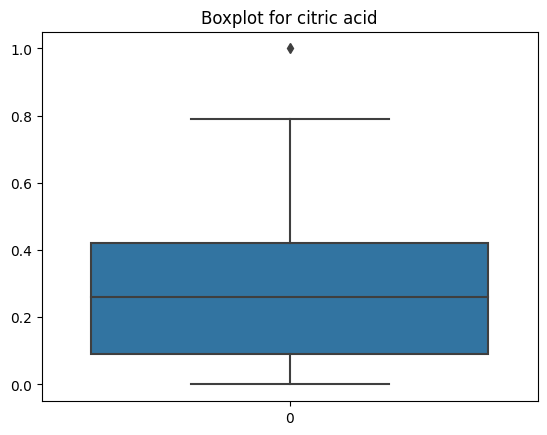

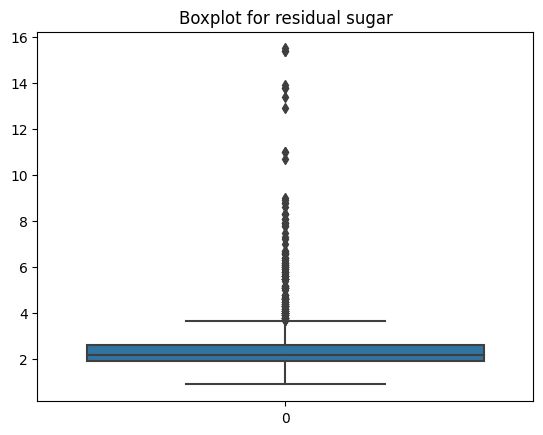

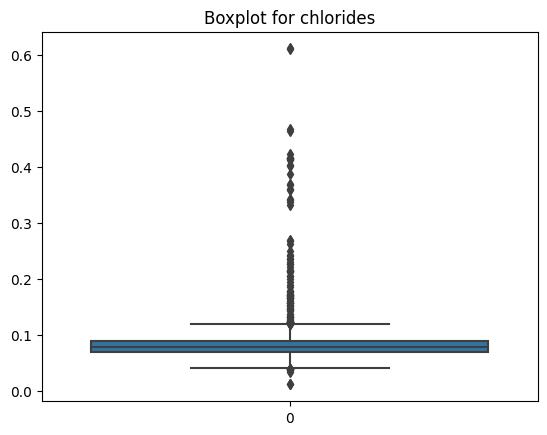

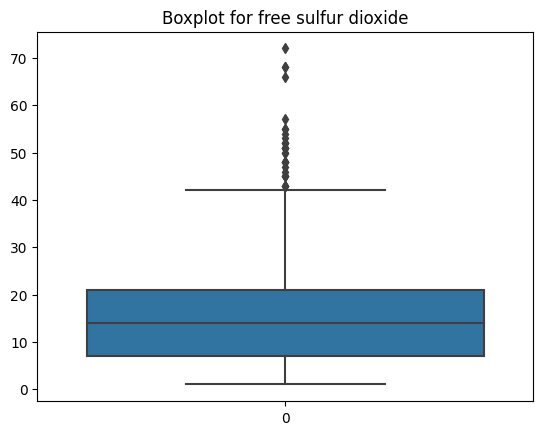

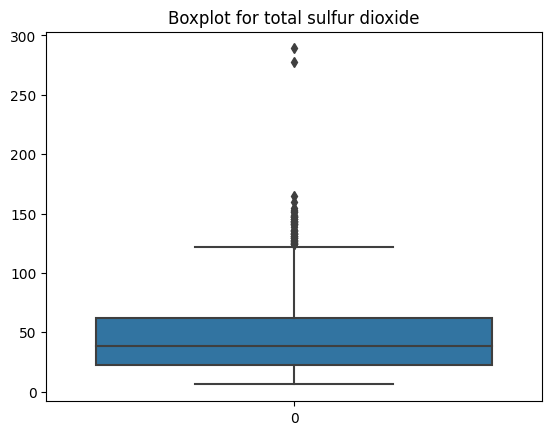

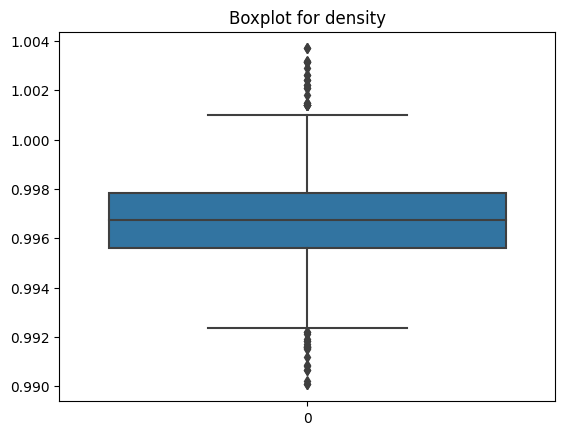

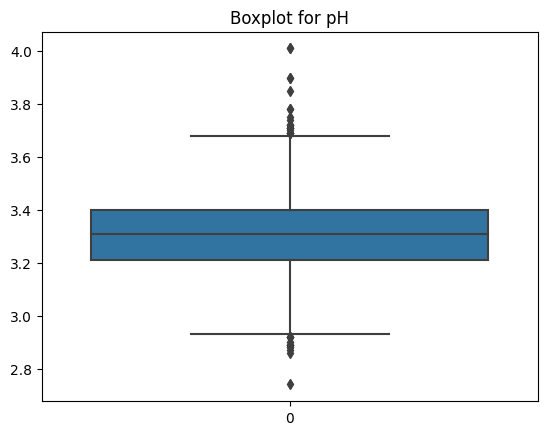

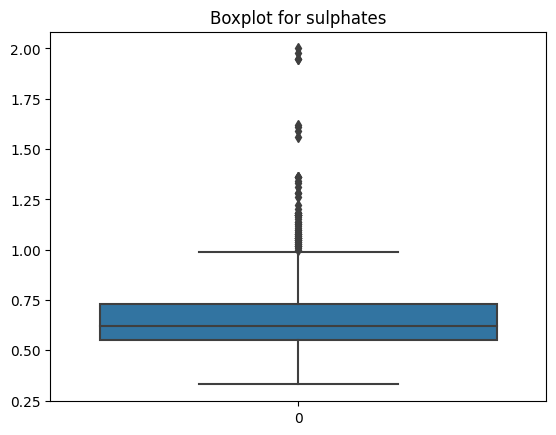

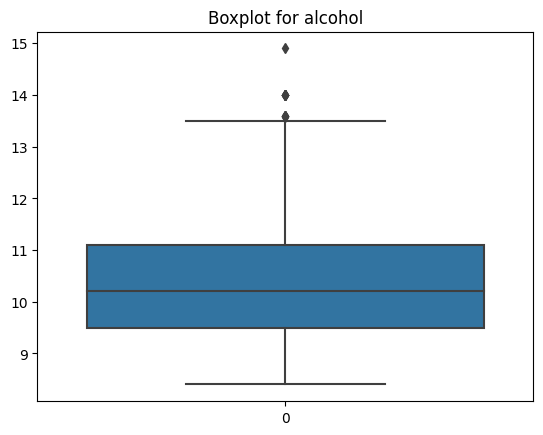

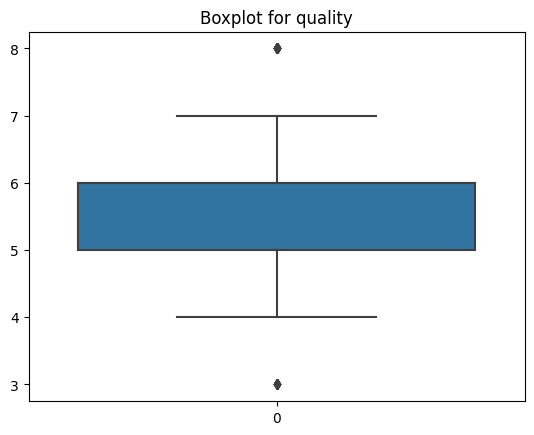

In [9]:
#Untuk mendapatkan nama kolom
columns = dataset.columns

#looping untuk display boxplot semua
for column in columns:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(data=dataset[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

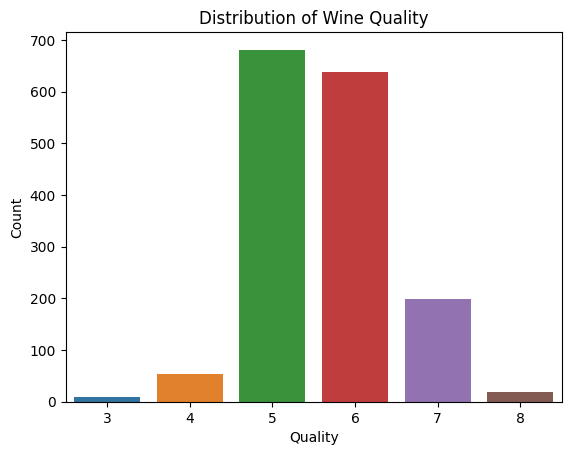

In [10]:
# Tampilkan EDA Univariate secara grafik dengan box plot
# for column in dataset.columns:
#     sns.boxplot(data=dataset[column])
#     plt.title(f"Boxplot for {column}")
#     plt.show()

#Histogram
sns.countplot(data=dataset, x='quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()


### Exploratory Data Analysis (Multivariate)

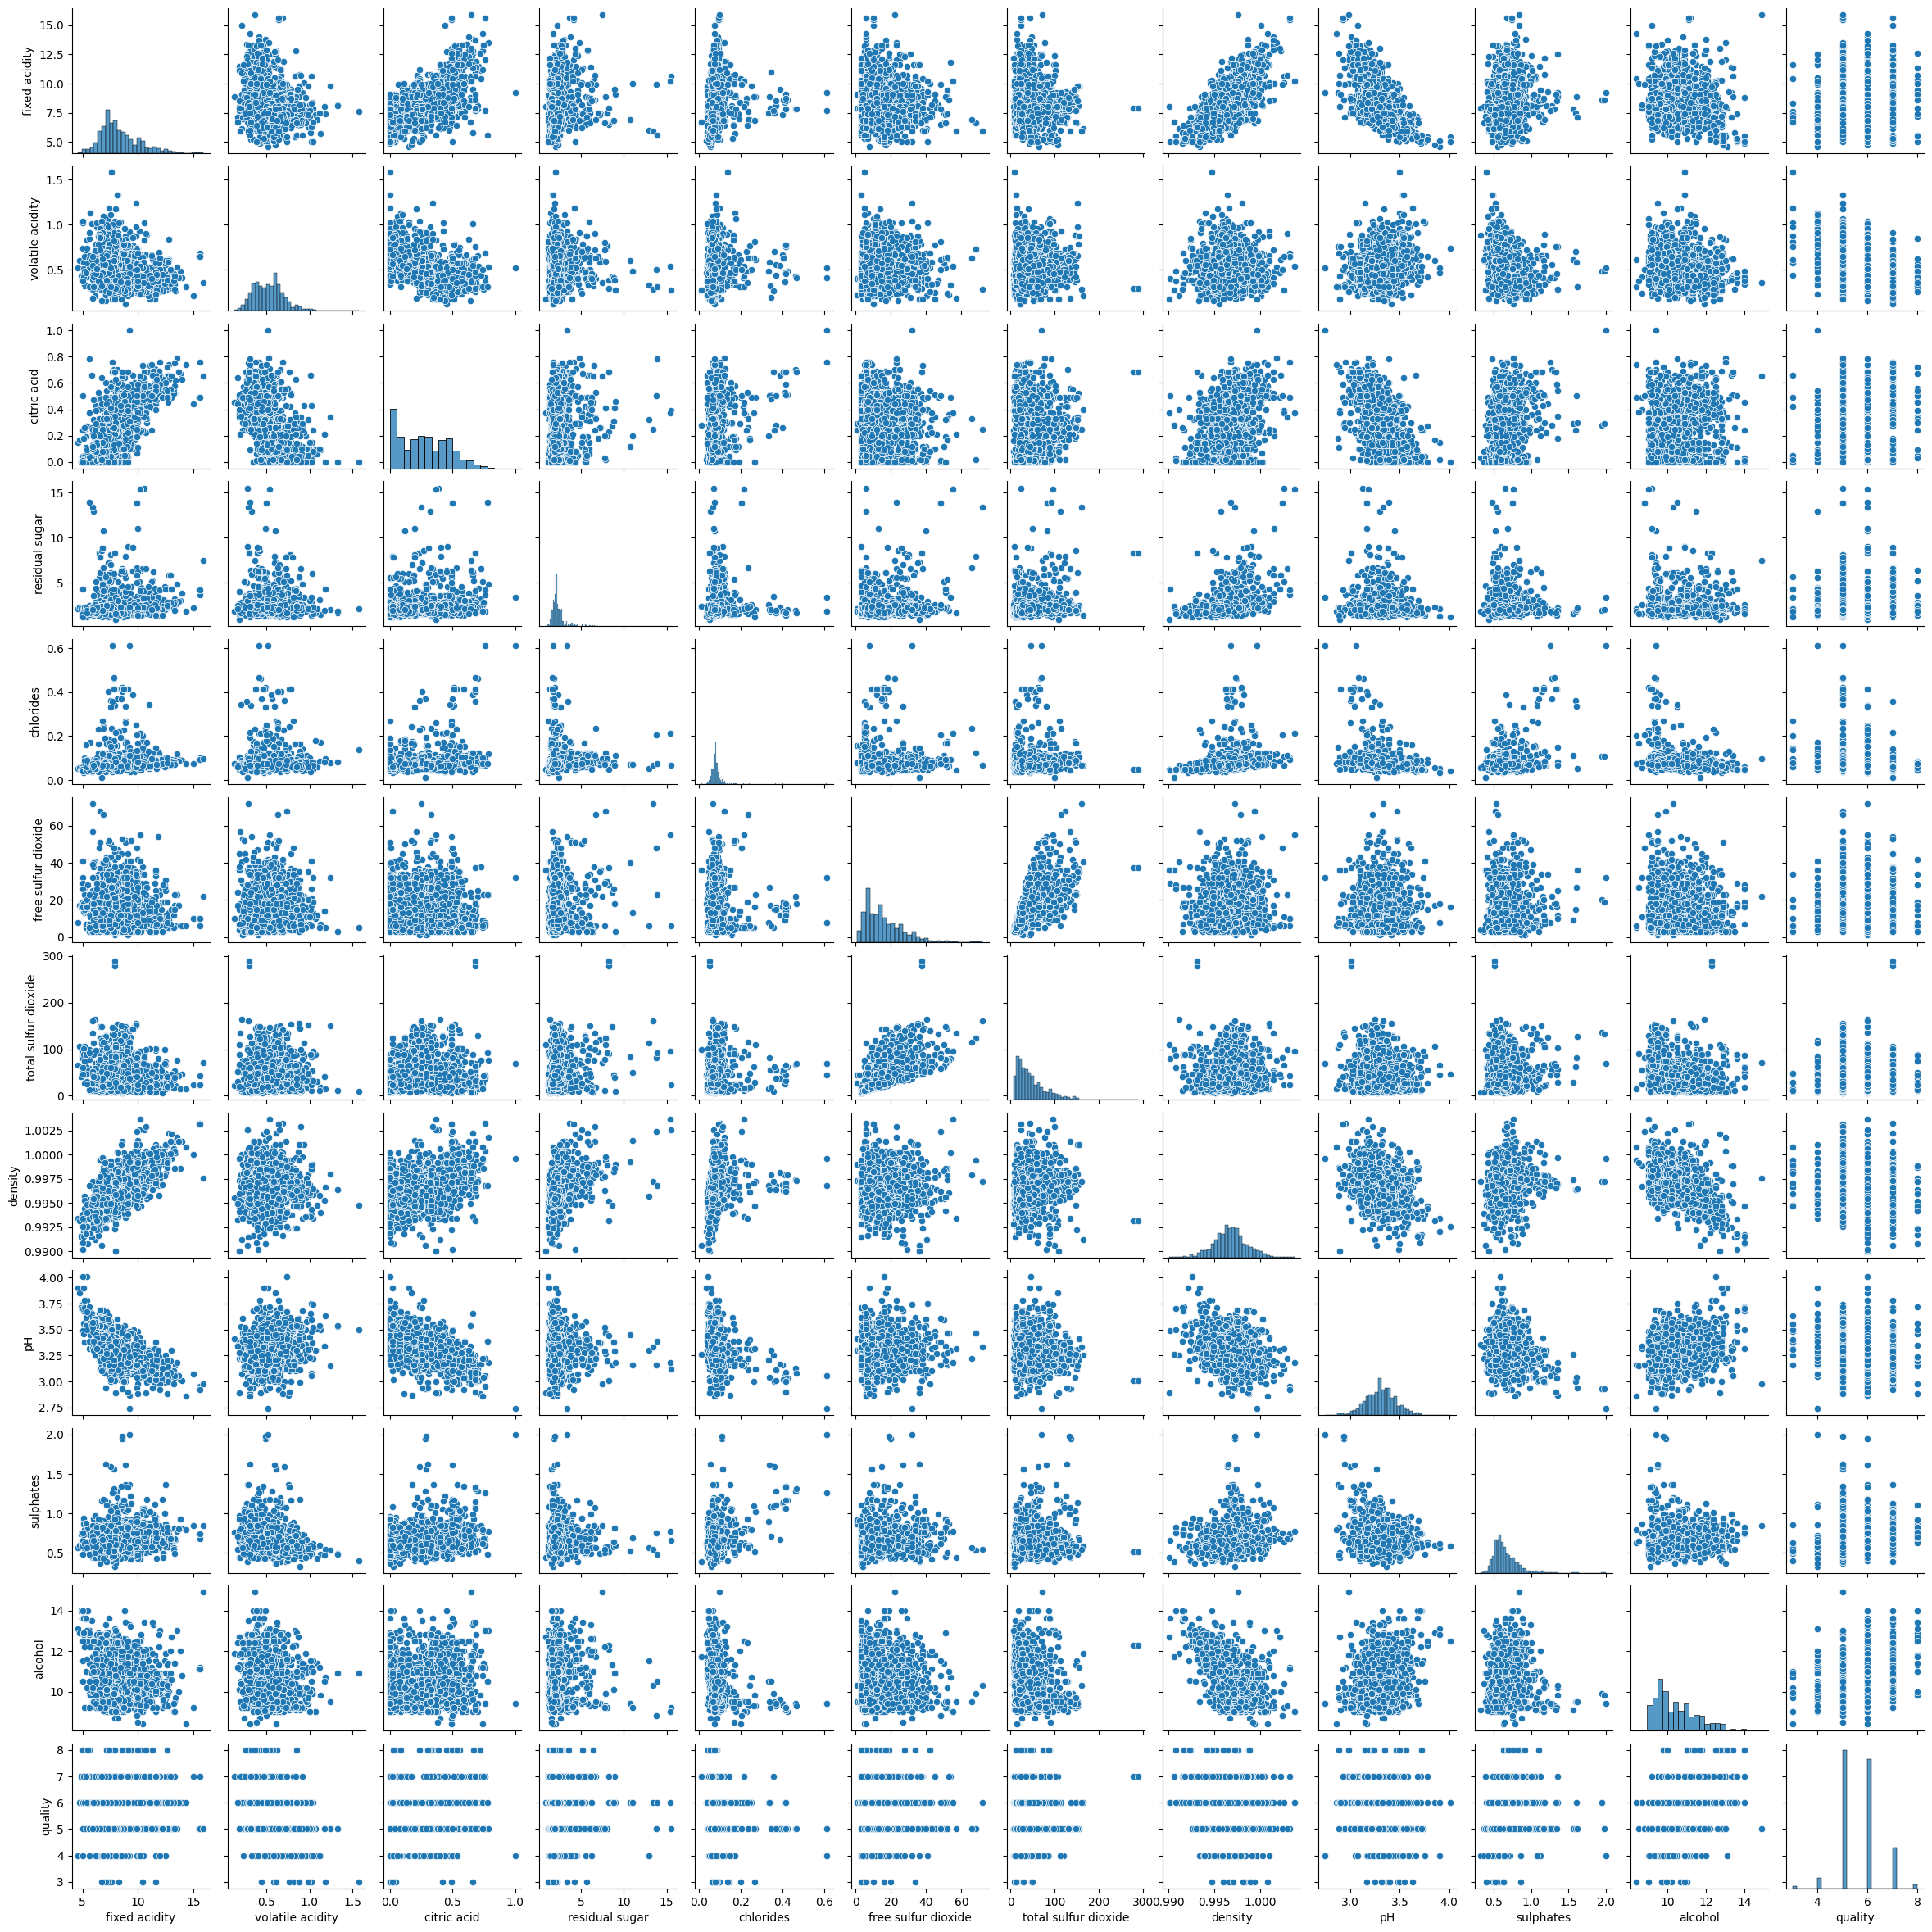

In [11]:
# Tampilkan EDA Multivariate dengan pair plot
sns.pairplot(dataset, height=2)
plt.show()

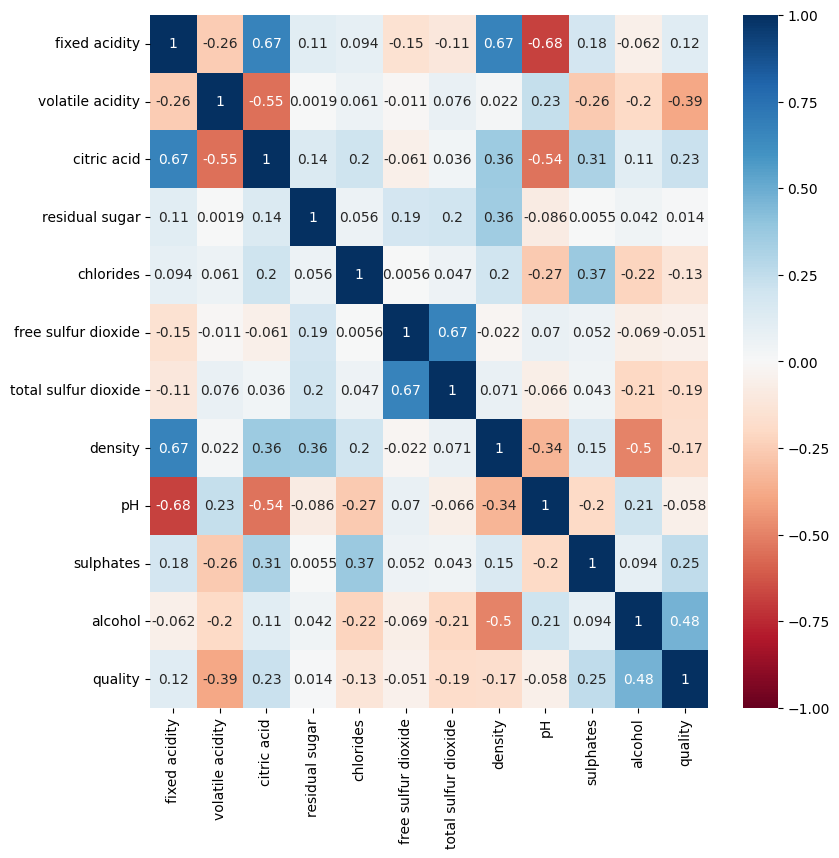

In [12]:
# Tampilkan kekuatan korelasi antar variabel dengan heatmap
plt.subplots(figsize=(9,9))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

### Determining Independent and Dependent Variables

In [13]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split dataset menjadi data Training dan data Test
Train test split is a model validation process that allows you to simulate how your model would perform with new data.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Membuat model persamaan Regresi berdasarkan data Training

In [15]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

#memasukkan Xtrain dan yrtrain untuk data model yang training
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#show the regressor intercept, coefficients and regression equation
print("Intercept: {:0.4f}".format(regressor.intercept_))
for i in range(len(regressor.coef_)):
    print("Coefficient b{}: {:0.4f}".format(i+1, regressor.coef_[i]))

equation = 'Regression Equation: y = '
for i in range(len(regressor.coef_)):
    equation += '{:0.4f} X{} + '.format(regressor.coef_[i], i+1)
equation += '{:0.4f}'.format(regressor.intercept_)

print(equation)

Intercept: 34.9987
Coefficient b1: 0.0413
Coefficient b2: -1.1495
Coefficient b3: -0.1779
Coefficient b4: 0.0279
Coefficient b5: -1.8734
Coefficient b6: 0.0027
Coefficient b7: -0.0028
Coefficient b8: -31.5167
Coefficient b9: -0.2545
Coefficient b10: 0.9240
Coefficient b11: 0.2678
Regression Equation: y = 0.0413 X1 + -1.1495 X2 + -0.1779 X3 + 0.0279 X4 + -1.8734 X5 + 0.0027 X6 + -0.0028 X7 + -31.5167 X8 + -0.2545 X9 + 0.9240 X10 + 0.2678 X11 + 34.9987


### Uji coba model persamaan berdasarkan data anonymous
Please predict the quality of a wine with fixed
acidity 11, volatile acidity 0.3, citric acid 0.6,
residual sugar 2, chlorides 0.075, free sulfur
dioxide 17, total sulfur dioxide 60, density 0.998,
pH 3.16, sulphates 0.58, alcohol 9.8

In [16]:
quality_pred = regressor.predict([[11, 0.3, 0.6,2,0.075,17,60,0.998,3.16,0.58,9.8]])
print('The predicted quality is {:.4f}'.format(quality_pred[0]))

The predicted quality is 5.6980


### Uji hasil prediksi dengan data Test


In [17]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529


### Finding the Coefficient of Determination
The coefficient of determination (r²) measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.<p>
The lowest possible value of r² is 0 and the highest possible value is 1. Put simply, the better a model is at making predictions, the closer its r² will be to 1.

In [18]:
# Find the Coefficient of Determination
r_square = regressor.score(X_train, y_train)
print('The Coefficient of Determination: {:0.4f}'.format(r_square))

The Coefficient of Determination: 0.3655


### Evaluating the Model Fit using RMSE
The root mean squared error is simply the square root of the mean squared error:<p>

In [19]:
from sklearn.metrics import mean_squared_error

# Berapakah rata-rata error yang terjadi antara y_test dan y_pred?
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))


Root Mean Squared Error (RMSE): 0.6201


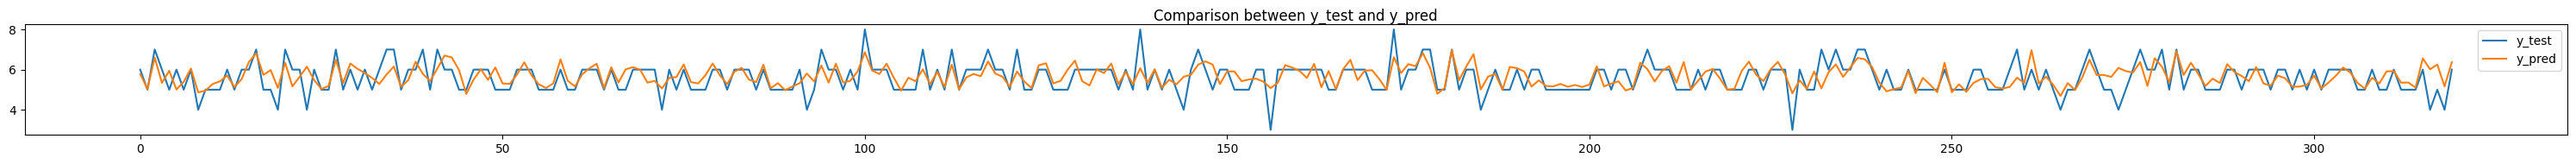

In [20]:
# Visualize the comparison between y_test and y_pred to depict the error margin
evaluate.plot(kind='line', figsize=(30, 2))
plt.title('Comparison between y_test and y_pred', pad=2)
plt.tight_layout()
plt.show()